<center><h1><u> Deep Solar Analysis<u></h1></center>

**Author: Buddy Bernhard**

### Summary:
Can we predict where there's a demand for solar panels and the supply isn't being met? The Deep Solar project is a is a deep learning framework that analyzes satellite imagery to identify the GPS locations and sizes of solar photovoltaic (PV) panels. That project was developed within Stanford's [Magic Lab](https://magiclab.stanford.edu/) and [Sustainable Systems Lab](https://magiclab.stanford.edu/). This project aims to utilize that data to pinpoint areas where solar infrastructure is underdeveloped. 

Misclassified data is where the difference from supply and demand stands out.

### Data:

* [DeepSolar database (census tract level)](http://web.stanford.edu/group/deepsolar/deepsolar_tract.csv)
* [DeepSolar database metadata](http://web.stanford.edu/group/deepsolar/deepsolar_tract_meta.csv)

### Data Analysis:


The data had 151 features and 72537 sub-counties as counted by the US Census bureau. The features and their descriptions can be found in the DeepSolar database metadata CSV.

In [8]:
df.shape

(72537, 151)

Within the DeepSolar published paper they included the below graph that shows features that impact the output, in their case the counting of solar panel, through variation of said feature.  

![alt text](RelativeFeatureImportanceOfSolarNN.PNG "Title")

The graph seems to indicate that the above features are important for their prediction model, so I used the same features to create my model. Before I could use them I needed normalize them, I did this by using [sklearn min-max scaler.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [6]:
pickedDF.head()

,population_density,net_metering,frost_days,daily_solar_radiation,relative_humidity,heating_degree_days,earth_temperature,has_tiles
0,0.000097,0.971429,0.747573,0.20354,0.845622,0.819375,0.152174,0
1,0.000409,0.971429,0.747573,0.20354,0.845622,0.819375,0.152174,0
2,0.000185,0.971429,0.747573,0.20354,0.845622,0.819375,0.152174,0
3,0.000263,0.971429,0.747573,0.20354,0.845622,0.819375,0.152174,0
4,0.000096,0.971429,0.747573,0.20354,0.843318,0.821172,0.160870,0


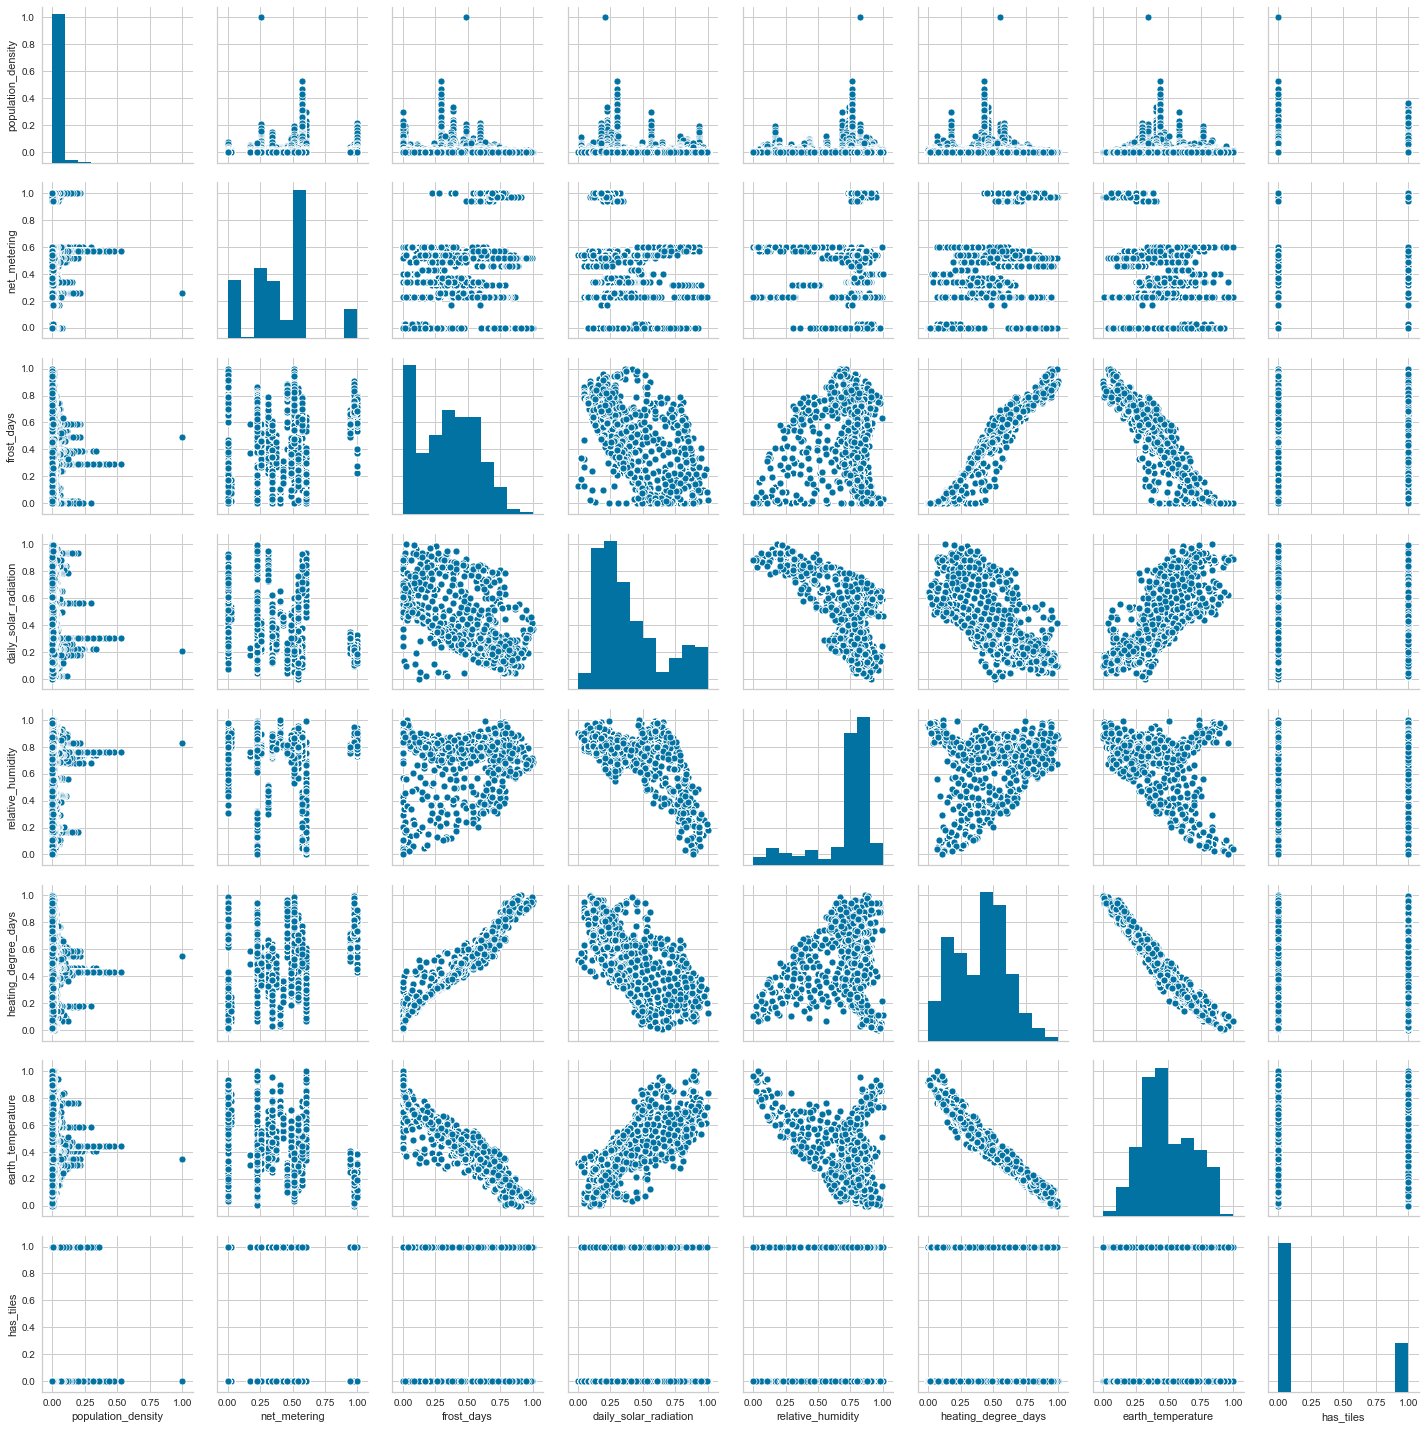

To create two targets, has solar panels and doesn't have solar panels. The tile_count feature within the DeepSolar dataset is the "number of image tiles containing solar power system" so if the number is greater than zero there is at least one solar panel with that census tract. After cleaning the dataset of all census tracts with missing data, this resulted in 25/75% split meaning that 75% of the county sub-divisions had no solar panels. I then used SMOTE to oversample the county sub-divisions with solar panels. 

### Findings & Application
* The results of running [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and trying the different solvers, along with a range of parameters on this sub-dataset allowed me to find the best results. The parameters for which were saga, c=10 and logistic regression with Ridge regularization. 
* My model is currently underfitting the data. The mean accuracy of the training data is 6% less than the test data. The mean accuracy is around 61%, the precision score is 30%, and the recall rate is 42%. Finally leading to a F1 Score of 35%. 

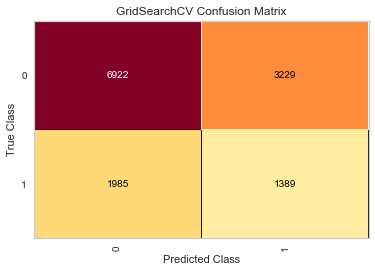

### Next Steps
* I would like to continue to add features, until my model is no longer underfitting, while still raising the precision, recall, and accuracy rates. 

### Support Documentation
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://stackoverflow.com/questions/30102973/how-to-get-best-estimator-on-gridsearchcv-random-forest-classifier-scikit
print(clf.best_params_)

https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html
SMOTE Example

https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html

http://blog.kaggle.com/2016/07/21/approaching-almost-any-machine-learning-problem-abhishek-thakur/

